![title](Beach.jpg)

# Business Understanding
Ask relevant questions and define objectives for the problem that needs to be tackled
## Glossary
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Variable Description
* **data_raw** - Originally imported dataset
* **data** - Main working dataset containing cleaned and refined data
* **data_clean** - Copy of data after 3 Data Cleaning used during 4 Data Exploration

## Open Topics
- Correlation matrix/heatmap
- Split into test and training sets
- Optimize Root Mean Squared Error (RMSE)
- Define AT LEAST 3 recommendations for home buyers in King County
- Write README.md file
- Change color palette to fit Google Slides
- Build meaningful visualizations
- Finalize Presentation

## Recommendations
- Optimal months to buy houses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set(style="white")
%matplotlib inline

import pandas as pd
import math
import numpy as np
import seaborn as sns
import datetime as dt
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib.gridspec import GridSpec
from scipy.stats import kstest
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
#Subplots
from plotly.subplots import make_subplots
from numpy import median
g = sns.FacetGrid(df,
                  col='view',
                  row='bedrooms',
                  hue='waterfront',
                  palette='Set2')
g = (g.map(plt.scatter, 'sqft_living', 'log_price').add_legend())

# Data Mining
Gather and scrape the data necessary for the project

In [2]:
data_raw = pd.read_csv("King_County_House_prices_dataset.csv")
data = data_raw

In [3]:
data.shape

(21597, 21)

In [4]:
# data.columns

In [5]:
# data.head()

# Data Cleaning
Fix the inconsistencies within the data and handle the missing values

## Inspection
- Describe (Summary)
- Datatypes
- Correlation
- Missing values

In [34]:
# Describe (Summary)
#data.describe().T

In [7]:
# Datatypes (data.info())
# data.info()

In [8]:
# Correlation
#data.corr().head()

In [38]:
# Missing values

print(data.isnull().sum())

def count_missing(data):
    null_cols = data.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    X_null = X_null.sort_values(ascending=False)
    print(X_null)
    
#count_missing(data)

date                       0
price                      0
bedrooms                   0
bathrooms                  0
sqft_lot                   0
floors                     0
waterfront                 0
sqft_above                 0
sqft_basement              0
yr_built                   0
yr_renovated               0
lat                        0
long                       0
sqft_living15              0
sqft_lot15                 0
date_month                 0
date_year                  0
renovated                  0
price_log                  0
yr_since_built             0
yr_since_last_renovated    0
condition_2                0
condition_3                0
condition_4                0
condition_5                0
grade_4                    0
grade_5                    0
grade_6                    0
grade_7                    0
grade_8                    0
                          ..
zipcode_98106              0
zipcode_98107              0
zipcode_98108              0
zipcode_98109 

## Data Handling
- date
- sqft_basement
- waterfront
- view
- outliers:
  - bedrooms
  - sqft_living
  - sqft_lot

In [10]:
# date: split into date_month and date_year, and make date a continuum from min to max - OPTIMIZE
data["date_month"] = [int(el.split("/")[0]) for el in data.date.values.tolist()]
data["date_year"] = [int(el.split("/")[2]) for el in data.date.values.tolist()]
data.date_old = data.date
data.date = data.date_month + (data.date_year-2014)*12

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [11]:
# sqft_basement: set to sqft_living - sqft_above
data.sqft_basement = data.sqft_living - data.sqft_above

In [12]:
# waterfront: Assume NaN=0
data.waterfront.fillna(0.0, inplace=True)

In [13]:
# view: Assume NaN=0 - OPTIMIZE (check whether 0 is a good assumption)
data.view.fillna(0.0, inplace=True)

In [14]:
# outliers: bedrooms (33 beds) - OPTIMIZE (how to remove outliers in a more systematic manner?)
data.drop(data.loc[data.bedrooms==data.bedrooms.max()].index.tolist(), axis=0, inplace=True)

In [15]:
# outliers: sqft_living (2)
data.drop(data.loc[data.sqft_living==data.sqft_living.max()].index.tolist(), axis=0, inplace=True)
#data.drop(data.loc[data.sqft_living==data.sqft_living.max()].index.tolist(), axis=0, inplace=True)

In [16]:
# outliers: sqft_lot
data.drop(data.loc[data.sqft_lot==data.sqft_lot.max()].index.tolist(), axis=0, inplace=True)

# Data Exploration
Form hypotheses about your defined problem by visually analyzing the data

In [17]:
# Clean data set for exploration
data_clean = data

In [18]:
# separate continuous vs. categorical variables
data_cat_col = ['condition', 'date', 'date_month', 'date_year', 'grade','zipcode', 'view']
data_cont_col = [el for el in data_clean.columns if el not in data_cat_col]
data_cont = data_clean[data_cont_col]
data_cat = data_clean[data_cat_col]

In [ ]:
# Describe price variable (histogram, info)

In [ ]:
# Look at data skew
data.skew()

In [19]:
# Correlation heatmap continuous
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(data_cont.corr(), dtype=np.bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(data_cont.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");

In [20]:
# Plot all variables as pairplot
#sns.pairplot(data_clean);

In [21]:
# Plot selection of variables as pairplot
#sns.pairplot(data_clean, kind="reg", vars=["price", "bedrooms", "bathrooms", "sqft_lot"], 
#             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [ ]:
# Plot FacetGrid


In [22]:
# Plot continuous variables
#plt.hist(data_clean.price, bins = 25);
#plt.hist(np.log(data_clean.price), bins = 25);
#plt.tight_layout()

In [23]:
# Plot categorical variables
#sns.stripplot(x=data_clean.condition.values, y = data_clean.price.values, 
#              jitter=0.1, alpha=0.5);

#sns.stripplot(x=data_clean.grade.values, y = data_clean.price.values,
#              jitter=0.1, alpha=0.5);

#sns.stripplot(x=data_clean.zipcode.values, y = data_clean.price.values,
#              jitter=0.1, alpha=0.5);

#sns.pointplot(x = data_clean.zipcode.values, y = data_clean.price.values,
#              order = data_clean.groupby("zipcode")["price"].mean().sort_values().index);

#plt.tight_layout()

# Feature Engineering
Select important features and construct more meaningful ones using the raw data that you have

- renovated
- price_log
- yr_since_built
- yr_renovated
- yr_since_last_renovated
- categorical --> dummies
  - condition
  - grade
  - zipcode
- drop:
  - id
  - date
  - condition
  - grade
  - zipcode
  - sqft_living

In [24]:
# renovated: Add 1/0 variable for whether house has been renovated, assuming 0 for NaN-Values
data["renovated"] = data["yr_renovated"] > 0
data.renovated.replace([True, False], [1, 0], inplace=True)

In [25]:
# price_log: column with log of price
# data.head()
data["price_log"] = [math.log(el) for el in data["price"]]
# data.price_log.hist();

In [26]:
# yr_since_built: column with years between yr_built and sold
data["yr_since_built"] = data.date_year - data.yr_built

In [27]:
# yr_renovated: fill column to represent the max from yr_renovated and yr_built
#data["yr_renovated"] = [max(data.yr_built[i],data.yr_renovated[i]) for i in data.yr_built]
data["yr_renovated"] = data[["yr_built","yr_renovated"]].max(axis=1)

In [28]:
# yr_since_last_renovated: column with years between yr_built or yr_renovated and sold
data["yr_since_last_renovated"] = data.date_year - data.yr_renovated

In [29]:
# categorical --> dummies - OPTIMIZE
cat = data.filter(["condition", 
                   "grade", 
                   "zipcode", "view"], axis=1).astype("category")
data_dum = pd.DataFrame()
data_dum_i = pd.DataFrame()
for i in cat:
    data_dum_i = pd.get_dummies(cat[i], prefix=i, drop_first=True)
    data_dum = pd.concat([data_dum, data_dum_i], axis=1)
data_without_dum = data
data = pd.concat([data, data_dum], axis=1)
# data_dum = pd.get_dummies(data, columns=["condition", "grade", "zipcode"], prefix=["condition", "grade","zipcode"])
# data_wo_dum = data
# data_new = pd.concat([data, data_dum], axis=1)

In [30]:
# drop: id, condition, grade, zipcode, sqft_living
data = data.drop(["id", "condition", "grade", "zipcode", "view", "sqft_living"], axis=1)

# Predictive Modeling
Train machine learning models, evaluate their performance and use them to make predictions

In [31]:
#1 OLS with y=price and all parameters
X = data.drop(["price", "price_log"], axis=1)
X = sm.add_constant(X)
y = data.price
data_results = sm.OLS(y,X).fit()
data_results.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1073.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:07:27   Log-Likelihood:            -2.8774e+05
No. Observations:               21594   AIC:                         5.757e+05
Df Residuals:                   21490   BIC:                         5.765e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.5205      0.721     -6.270      0.000      -5.934      -3.107
date                     4561.7525    373.455     12.215      0.000    3829.752    5293.753
bedrooms                -1.429e+04   1520.883     -9.398      0.000   -1.73e+04   -1.13e+04
bathrooms                2.492e+04   2454.193     10.155      0.000    2.01e+04    2.97e+04
sqft_lot                    0.2418      0.037      6.509      0.000       0.169       0.315
floors                   -2.85e+04   2964.004     -9.616      0.000   -3.43e+04   -2.27e+04
waterfront               5.924e+05   1.54e+04     38.549      0.000    5.62e+05    6.23e+05
sqft_above                168.8087      2.933     57.562      0.000     163.061     174.557
sqft_basement             116.7574      3.320     35.164      0.000     110.249     123.266
yr_built                -4804.2510    715.222     -6.717      0.000   -6206.140   -3402.362
yr_renovated            -3823.2972    715.607     -5.343      0.000   -5225.940   -2420.654
lat                      2.054e+05   5.87e+04      3.500      0.000    9.04e+04     3.2e+05
long                    -2.019e+05   4.22e+04     -4.784      0.000   -2.85e+05   -1.19e+05
sqft_living15              16.0252      2.698      5.939      0.000      10.737      21.314
sqft_lot15                 -0.1217      0.056     -2.162      0.031      -0.232      -0.011
date_month              -2916.3535    419.371     -6.954      0.000   -3738.353   -2094.354
date_year               -8481.0718   1412.445     -6.005      0.000   -1.12e+04   -5712.574
renovated                 1.26e+04   1.43e+04      0.879      0.379   -1.55e+04    4.07e+04
yr_since_built          -3676.8208    716.660     -5.130      0.000   -5081.527   -2272.115
yr_since_last_renovated -4657.7745    716.483     -6.501      0.000   -6062.134   -3253.415
condition_2               9.12e+04      3e+04      3.037      0.002    3.23e+04     1.5e+05
condition_3              1.023e+05   2.79e+04      3.660      0.000    4.75e+04    1.57e+05
condition_4              1.287e+05    2.8e+04      4.604      0.000    7.39e+04    1.83e+05
condition_5              1.754e+05   2.81e+04      6.236      0.000     1.2e+05     2.3e+05
grade_4                 -9.519e+04   1.52e+05     -0.628      0.530   -3.92e+05    2.02e+05
grade_5                 -1.324e+05   1.49e+05     -0.887      0.375   -4.25e+05     1.6e+05
grade_6                 -1.354e+05   1.49e+05     -0.909      0.363   -4.27e+05    1.57e+05
grade_7                 -1.328e+05   1.49e+05     -0.891      0.373   -4.25e+05    1.59e+05
grade_8                 -1.107e+05   1.49e+05     -0.743      0.457   -4.03e+05    1.81e+05
grade_9                 -3.855e+04   1.49e+05     -0.259      0.796   -3.31e+05    2.54e+05
grade_10                   8.1e+04   1.49e+05  

In [32]:
#2 OLS with y=price and all but selected variables
X2 = data.drop(["price", "price_log", "renovated", "yr_since_last_renovated", 
               "yr_renovated", "yr_built", "lat", "long"], axis=1)
X2 = sm.add_constant(X2)
y2 = data.price
data_results = sm.OLS(y2,X2).fit()
data_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1107.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:07:27   Log-Likelihood:            -2.8782e+05
No. Observations:               21594   AIC:                         5.758e+05
Df Residuals:                   21494   BIC:                         5.766e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2069      0.041     -5.019      0.000      -0.288      -0.126
date            3049.7521    291.915     10.447      0.000    2477.578    3621.926
bedrooms       -1.512e+04   1524.005     -9.923      0.000   -1.81e+04   -1.21e+04
bathrooms       2.839e+04   2439.925     11.635      0.000    2.36e+04    3.32e+04
sqft_lot           0.2310      0.037      6.201      0.000       0.158       0.304
floors          -2.65e+04   2964.553     -8.938      0.000   -3.23e+04   -2.07e+04
waterfront      5.951e+05   1.54e+04     38.664      0.000    5.65e+05    6.25e+05
sqft_above       168.3504      2.941     57.246      0.000     162.586     174.115
sqft_basement    117.6258      3.330     35.319      0.000     111.098     124.153
sqft_living15     14.6026      2.702      5.404      0.000       9.307      19.899
sqft_lot15        -0.1328      0.056     -2.354      0.019      -0.243      -0.022
date_month     -1484.4444    347.458     -4.272      0.000   -2165.487    -803.402
date_year        -38.7870     75.697     -0.512      0.608    -187.160     109.586
yr_since_built   512.9961     58.176      8.818      0.000     398.967     627.025
condition_2     9.069e+04   3.01e+04      3.011      0.003    3.17e+04     1.5e+05
condition_3     1.057e+05    2.8e+04      3.772      0.000    5.08e+04    1.61e+05
condition_4     1.273e+05    2.8e+04      4.538      0.000    7.23e+04    1.82e+05
condition_5     1.715e+05   2.82e+04      6.079      0.000    1.16e+05    2.27e+05
grade_4        -9.065e+04   1.52e+05     -0.596      0.551   -3.89e+05    2.08e+05
grade_5        -1.286e+05    1.5e+05     -0.859      0.390   -4.22e+05    1.65e+05
grade_6        -1.275e+05   1.49e+05     -0.853      0.394    -4.2e+05    1.65e+05
grade_7        -1.223e+05   1.49e+05     -0.818      0.413   -4.15e+05    1.71e+05
grade_8        -9.822e+04    1.5e+05     -0.657      0.511   -3.91e+05    1.95e+05
grade_9        -2.531e+04    1.5e+05     -0.169      0.866   -3.18e+05    2.68e+05
grade_10        9.293e+04    1.5e+05      0.621      0.535      -2e+05    3.86e+05
grade_11        2.866e+05    1.5e+05      1.912      0.056   -7154.839     5.8e+05
grade_12        6.982e+05   1.51e+05      4.634      0.000    4.03e+05    9.94e+05
grade_13        1.788e+06   1.56e+05     11.477      0.000    1.48e+06    2.09e+06
zipcode_98002   5833.6112   1.32e+04      0.441      0.659   -2.01e+04    3.17e+04
zipcode_98003  -6707.1480   1.19e+04     -0.564      0.573      -3e+04    1.66e+04
zipcode_98004   7.644e+05   1.17e+04     65.527      0.000    7.42e+05    7.87e+05
zipcode_98005   3.036e+05   1.41e+04     21.547      0.000    2.76e+05    3.31e+05
zipcode_98006   2.465e+05   1.05e+04     23.373      0.000    2.26e+05    2.67e+05
zipcode_98007   2.537e+05   1.49e+04     17.057      0.000    2.25e+05    2.83e+05
zipcode_9800

In [35]:
#3 OLS with y=price and without dummies
X3 = data[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', "yr_since_last_renovated"]]
X3 = sm.add_constant(X3)
y3 = data.price_log
data_results = sm.OLS(y3,X3).fit()
data_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     4189.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:09:48   Log-Likelihood:                -3188.5
No. Observations:               21594   AIC:                             6405.
Df Residuals:                   21580   BIC:                             6517.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -82.7024      2.071    -39.925      0.000     -86.763     -78.642
bedrooms                   -0.0374      0.003    -13.764      0.000      -0.043      -0.032
bathrooms                   0.1006      0.005     22.182      0.000       0.092       0.109
sqft_lot                 5.502e-07   6.97e-08      7.895      0.000    4.14e-07    6.87e-07
floors                      0.0900      0.005     18.092      0.000       0.080       0.100
waterfront                  0.5642      0.024     23.841      0.000       0.518       0.611
sqft_above                  0.0002   4.75e-06     52.155      0.000       0.000       0.000
sqft_basement               0.0002   5.94e-06     41.953      0.000       0.000       0.000
lat                         1.4313      0.014     99.783      0.000       1.403       1.459
long                       -0.2162      0.016    -13.259      0.000      -0.248      -0.184
sqft_living15               0.0002   4.51e-06     43.000      0.000       0.000       0.000
sqft_lot15              -3.509e-07   1.03e-07     -3.406      0.001   -5.53e-07   -1.49e-07
renovated                   0.2345      0.011     21.671      0.000       0.213       0.256
yr_since_last_renovated     0.0029   9.26e-05     31.184      0.000       0.003       0.003
==============================================================================
Omnibus:                      298.218   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              535.135
Skew:                          -0.069   Prob(JB):                    6.27e-117
Kurtosis:                       3.759   Cond. No.                     5.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficients: 
 [ 0.18642669  0.00253616  0.00029453 -0.06955769]
MAE: 0.32432576744541497
MSE: 0.16234064741122928
RMSE: 0.4029151863745387


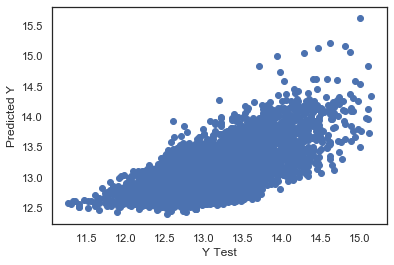

In [36]:
#4 Advanced model using price_log
y4 = data['price_log']
X4 = data[['bathrooms', 'bedrooms', 'sqft_above', 'floors']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,
                                                        y4,
                                                        test_size=0.33,
                                                        random_state=42,
                                                        shuffle=False)

lm = LinearRegression()
lm.fit(X4_train, y4_train)
print('Coefficients: \n', lm.coef_)

predictions = lm.predict(X4_test)
plt.scatter(y4_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# calculate these metrics by hand!
print('MAE:', metrics.mean_absolute_error(y4_test, predictions))
print('MSE:', metrics.mean_squared_error(y4_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, predictions)))

In [ ]:
# Histogram for test predictions
sns.distplot((y4_test-predictions),bins=50);
plt.tight_layout()

In [39]:
from sklearn.metrics import r2_score
r2_score(y4_test, predictions)

0.4133794473214313

# Data Visualization
Communicate the findings with key stakeholders using plots and interactive visualizations